In [1]:
import geopandas as gpd
import csv
from shapely.geometry import Point
import pandas as pd

In [2]:
gdf_county = gpd.read_file('D:\\akash\\reeds\\ReEDS-2.0\\inputs\\shapefiles\\US_COUNTY_2022')
gdf_county

,rb,FIPS,NAME,NAMELSAD,COUNTYFP,STATE,STCODE,STATEFP,COUNTRY,geometry
0,p31039,31039,Cuming,Cuming County,039,Nebraska,NE,31,USA,"POLYGON ((-43298.186 226319.408, -43299.219 22..."
1,p31109,31109,Lancaster,Lancaster County,109,Nebraska,NE,31,USA,"POLYGON ((-54607.861 61942.516, -55186.581 619..."
2,p31129,31129,Nuckolls,Nuckolls County,129,Nebraska,NE,31,USA,"POLYGON ((-182406.158 16155.427, -182398.289 1..."
3,p31101,31101,Keith,Keith County,101,Nebraska,NE,31,USA,"POLYGON ((-476610.913 168632.854, -476586.308 ..."
4,p31137,31137,Phelps,Phelps County,137,Nebraska,NE,31,USA,"POLYGON ((-253440.185 66198.276, -253441.383 6..."
...,...,...,...,...,...,...,...,...,...,...
3104,p09150,09150,Northeastern Connecticut,Northeastern Connecticut Planning Region,150,Connecticut,CT,09,USA,"POLYGON ((1832947.497 462109.783, 1832953.493 ..."
3105,p09160,09160,Northwest Hills,Northwest Hills Planning Region,160,Connecticut,CT,09,USA,"POLYGON ((1782099.228 419654.015, 1781992.842 ..."
3106,p09170,09170,South Central Connecticut,South Central Connecticut Planning Region,170,Connecticut,CT,09,USA,"POLYGON ((1798223.769 391228.414, 1798231.716 ..."
3107,p09180,09180,Southeastern Connecticut,Southeastern Connecticut Planning Region,180,Connecticut,CT,09,USA,"POLYGON ((1867004.718 387785.361, 1866978.315 ..."


In [3]:
rts_bus = pd.read_csv('D:\\akash\\reeds\\ReEDS-2.0\\RTS_Data\\SourceData\\bus_final.csv')
rts_bus

,Bus_ID,Bus_Name,BaseKV,Bus_Type,MW_Load,MVAR_Load,V_Mag,V_Angle,MW_Shunt_G,MVAR_Shunt_B,Area,Sub_Area,Zone,lat,lng,county_name,st,nodal,county,ba
0,101,Abel,138.0,PV,108.0,22.0,1.04777,-7.74152,0.0,0.0,1,11.0,11.0,33.396103,-113.835642,la paz,AZ,b101,p04012,p28
1,104,Agricola,138.0,PQ,74.0,15.0,1.01765,-10.56614,0.0,0.0,1,11.0,11.0,33.812304,-113.825419,la paz,AZ,b104,p04012,p28
2,105,Aiken,138.0,PQ,71.0,14.0,1.03568,-10.70887,0.0,0.0,1,11.0,11.0,33.659560,-113.999023,la paz,AZ,b105,p04012,p28
3,106,Alber,138.0,PQ,136.0,28.0,1.03242,-13.27944,0.0,-100.0,1,11.0,12.0,33.738036,-114.181924,la paz,AZ,b106,p04012,p28
4,109,Ali,138.0,PQ,175.0,36.0,1.02610,-8.81524,0.0,0.0,1,11.0,13.0,33.920436,-114.308281,la paz,AZ,b109,p04012,p28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,310,Caruso,138.0,PQ,195.0,40.0,1.05000,-12.30117,0.0,0.0,3,31.0,33.0,34.729316,-118.104525,los angeles,CA,b310,p06037,p10
69,311,Cary,230.0,PQ,0.0,0.0,1.02830,-5.74069,0.0,0.0,3,31.0,33.0,34.742094,-118.111933,los angeles,CA,b311,p06037,p10
70,312,Caxton,230.0,PQ,0.0,0.0,1.01900,-4.14604,0.0,0.0,3,31.0,33.0,34.722963,-118.119887,los angeles,CA,b312,p06037,p10
71,313,Cecil,230.0,PV,265.0,54.0,1.03802,-2.41513,0.0,0.0,3,32.0,34.0,34.265268,-118.018855,los angeles,CA,b313,p06037,p10


In [4]:
nodal_geodata = [Point(lon,lat) for lon, lat in zip(rts_bus['lng'],rts_bus['lat'])]
gdf_nodes = gpd.GeoDataFrame(rts_bus, geometry=nodal_geodata, crs="EPSG:4269")
gdf_nodes

,Bus_ID,Bus_Name,BaseKV,Bus_Type,MW_Load,MVAR_Load,V_Mag,V_Angle,MW_Shunt_G,MVAR_Shunt_B,...,Sub_Area,Zone,lat,lng,county_name,st,nodal,county,ba,geometry
0,101,Abel,138.0,PV,108.0,22.0,1.04777,-7.74152,0.0,0.0,...,11.0,11.0,33.396103,-113.835642,la paz,AZ,b101,p04012,p28,POINT (-113.83564 33.39610)
1,104,Agricola,138.0,PQ,74.0,15.0,1.01765,-10.56614,0.0,0.0,...,11.0,11.0,33.812304,-113.825419,la paz,AZ,b104,p04012,p28,POINT (-113.82542 33.81230)
2,105,Aiken,138.0,PQ,71.0,14.0,1.03568,-10.70887,0.0,0.0,...,11.0,11.0,33.659560,-113.999023,la paz,AZ,b105,p04012,p28,POINT (-113.99902 33.65956)
3,106,Alber,138.0,PQ,136.0,28.0,1.03242,-13.27944,0.0,-100.0,...,11.0,12.0,33.738036,-114.181924,la paz,AZ,b106,p04012,p28,POINT (-114.18192 33.73804)
4,109,Ali,138.0,PQ,175.0,36.0,1.02610,-8.81524,0.0,0.0,...,11.0,13.0,33.920436,-114.308281,la paz,AZ,b109,p04012,p28,POINT (-114.30828 33.92044)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,310,Caruso,138.0,PQ,195.0,40.0,1.05000,-12.30117,0.0,0.0,...,31.0,33.0,34.729316,-118.104525,los angeles,CA,b310,p06037,p10,POINT (-118.10452 34.72932)
69,311,Cary,230.0,PQ,0.0,0.0,1.02830,-5.74069,0.0,0.0,...,31.0,33.0,34.742094,-118.111933,los angeles,CA,b311,p06037,p10,POINT (-118.11193 34.74209)
70,312,Caxton,230.0,PQ,0.0,0.0,1.01900,-4.14604,0.0,0.0,...,31.0,33.0,34.722963,-118.119887,los angeles,CA,b312,p06037,p10,POINT (-118.11989 34.72296)
71,313,Cecil,230.0,PV,265.0,54.0,1.03802,-2.41513,0.0,0.0,...,32.0,34.0,34.265268,-118.018855,los angeles,CA,b313,p06037,p10,POINT (-118.01886 34.26527)


<AxesSubplot:>

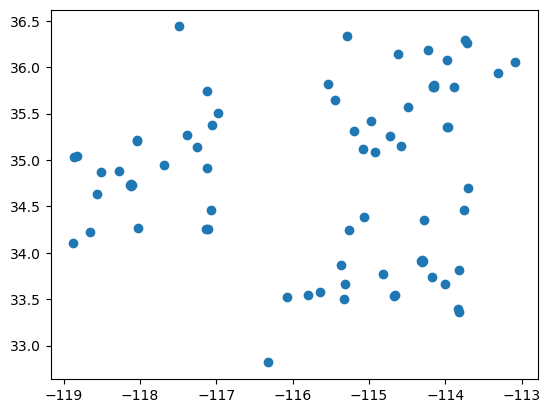

In [5]:
gdf_nodes.plot()


<AxesSubplot:>

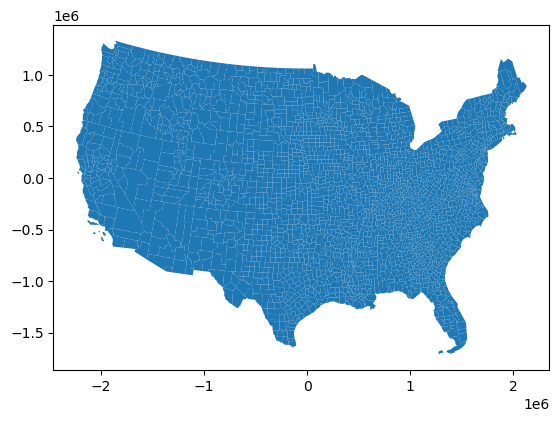

In [6]:
gdf_county.plot()

In [7]:
gdf_nodes = gdf_nodes.to_crs(gdf_county.crs)
gdf_nodes

,Bus_ID,Bus_Name,BaseKV,Bus_Type,MW_Load,MVAR_Load,V_Mag,V_Angle,MW_Shunt_G,MVAR_Shunt_B,...,Sub_Area,Zone,lat,lng,county_name,st,nodal,county,ba,geometry
0,101,Abel,138.0,PV,108.0,22.0,1.04777,-7.74152,0.0,0.0,...,11.0,11.0,33.396103,-113.835642,la paz,AZ,b101,p04012,p28,POINT (-1570107.419 -626752.667)
1,104,Agricola,138.0,PQ,74.0,15.0,1.01765,-10.56614,0.0,0.0,...,11.0,11.0,33.812304,-113.825419,la paz,AZ,b104,p04012,p28,POINT (-1560147.874 -579254.675)
2,105,Aiken,138.0,PQ,71.0,14.0,1.03568,-10.70887,0.0,0.0,...,11.0,11.0,33.659560,-113.999023,la paz,AZ,b105,p04012,p28,POINT (-1578522.122 -593877.253)
3,106,Alber,138.0,PQ,136.0,28.0,1.03242,-13.27944,0.0,-100.0,...,11.0,12.0,33.738036,-114.181924,la paz,AZ,b106,p04012,p28,POINT (-1592622.019 -581832.857)
4,109,Ali,138.0,PQ,175.0,36.0,1.02610,-8.81524,0.0,0.0,...,11.0,13.0,33.920436,-114.308281,la paz,AZ,b109,p04012,p28,POINT (-1599468.904 -558821.231)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,310,Caruso,138.0,PQ,195.0,40.0,1.05000,-12.30117,0.0,0.0,...,31.0,33.0,34.729316,-118.104525,los angeles,CA,b310,p06037,p10,POINT (-1903788.251 -396316.175)
69,311,Cary,230.0,PQ,0.0,0.0,1.02830,-5.74069,0.0,0.0,...,31.0,33.0,34.742094,-118.111933,los angeles,CA,b311,p06037,p10,POINT (-1904069.417 -394714.010)
70,312,Caxton,230.0,PQ,0.0,0.0,1.01900,-4.14604,0.0,0.0,...,31.0,33.0,34.722963,-118.119887,los angeles,CA,b312,p06037,p10,POINT (-1905259.010 -396730.090)
71,313,Cecil,230.0,PV,265.0,54.0,1.03802,-2.41513,0.0,0.0,...,32.0,34.0,34.265268,-118.018855,los angeles,CA,b313,p06037,p10,POINT (-1909023.837 -450796.829)


<AxesSubplot:>

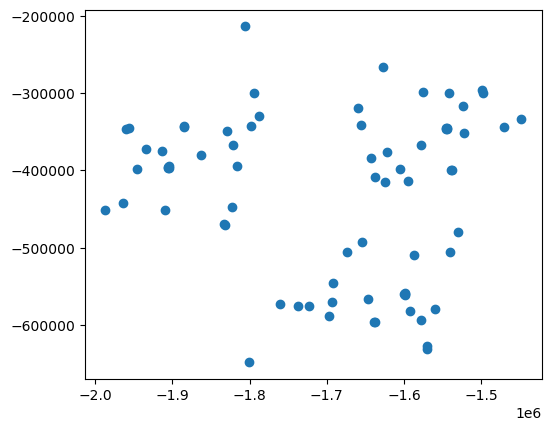

In [8]:
gdf_nodes.plot()

In [17]:
nodal_subset = gpd.sjoin(gdf_nodes, gdf_county, how='inner', predicate='intersects')
nodal_subset.drop(['Bus_ID','BaseKV','Bus_Type', 'MW_Load', 'county_name', 'st', 'MVAR_Load','V_Mag', 'V_Angle', 'MW_Shunt_G', 'MVAR_Shunt_B'], axis=1, inplace=True)
nodal_subset

,Bus_Name,Area,Sub_Area,Zone,lat,lng,nodal,county,ba,geometry,index_right,rb,FIPS,NAME,NAMELSAD,COUNTYFP,STATE,STCODE,STATEFP,COUNTRY
0,Abel,1,11.0,11.0,33.396103,-113.835642,b101,p04012,p28,POINT (-1570107.419 -626752.667),3088,p04012,04012,La Paz,La Paz County,012,Arizona,AZ,04,USA
1,Agricola,1,11.0,11.0,33.812304,-113.825419,b104,p04012,p28,POINT (-1560147.874 -579254.675),3088,p04012,04012,La Paz,La Paz County,012,Arizona,AZ,04,USA
2,Aiken,1,11.0,11.0,33.659560,-113.999023,b105,p04012,p28,POINT (-1578522.122 -593877.253),3088,p04012,04012,La Paz,La Paz County,012,Arizona,AZ,04,USA
3,Alber,1,11.0,12.0,33.738036,-114.181924,b106,p04012,p28,POINT (-1592622.019 -581832.857),3088,p04012,04012,La Paz,La Paz County,012,Arizona,AZ,04,USA
4,Ali,1,11.0,13.0,33.920436,-114.308281,b109,p04012,p28,POINT (-1599468.904 -558821.231),3088,p04012,04012,La Paz,La Paz County,012,Arizona,AZ,04,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,Caruso,3,31.0,33.0,34.729316,-118.104525,b310,p06037,p10,POINT (-1903788.251 -396316.175),490,p06037,06037,Los Angeles,Los Angeles County,037,California,CA,06,USA
69,Cary,3,31.0,33.0,34.742094,-118.111933,b311,p06037,p10,POINT (-1904069.417 -394714.010),490,p06037,06037,Los Angeles,Los Angeles County,037,California,CA,06,USA
70,Caxton,3,31.0,33.0,34.722963,-118.119887,b312,p06037,p10,POINT (-1905259.010 -396730.090),490,p06037,06037,Los Angeles,Los Angeles County,037,California,CA,06,USA
71,Cecil,3,32.0,34.0,34.265268,-118.018855,b313,p06037,p10,POINT (-1909023.837 -450796.829),490,p06037,06037,Los Angeles,Los Angeles County,037,California,CA,06,USA


In [18]:
county_subset = gpd.sjoin(gdf_county, gdf_nodes, how='inner', predicate='intersects')
county_subset.drop(['Bus_ID','BaseKV','Bus_Type', 'MW_Load', 'county_name', 'st', 'MVAR_Load','V_Mag', 'V_Angle', 'MW_Shunt_G', 'MVAR_Shunt_B'], axis=1, inplace=True)
county_subset

,rb,FIPS,NAME,NAMELSAD,COUNTYFP,STATE,STCODE,STATEFP,COUNTRY,geometry,index_right,Bus_Name,Area,Sub_Area,Zone,lat,lng,nodal,county,ba
490,p06037,06037,Los Angeles,Los Angeles County,037,California,CA,06,USA,"MULTIPOLYGON (((-1998969.689 -576149.896, -199...",65,Carew,3,31.0,32.0,34.101266,-118.878178,b307,p06037,p10
490,p06037,06037,Los Angeles,Los Angeles County,037,California,CA,06,USA,"MULTIPOLYGON (((-1998969.689 -576149.896, -199...",71,Cecil,3,32.0,34.0,34.265268,-118.018855,b313,p06037,p10
490,p06037,06037,Los Angeles,Los Angeles County,037,California,CA,06,USA,"MULTIPOLYGON (((-1998969.689 -576149.896, -199...",66,Carrel,3,31.0,32.0,34.224718,-118.654258,b308,p06037,p10
490,p06037,06037,Los Angeles,Los Angeles County,037,California,CA,06,USA,"MULTIPOLYGON (((-1998969.689 -576149.896, -199...",64,Caine,3,31.0,31.0,34.632091,-118.563585,b304,p06037,p10
490,p06037,06037,Los Angeles,Los Angeles County,037,California,CA,06,USA,"MULTIPOLYGON (((-1998969.689 -576149.896, -199...",70,Caxton,3,31.0,33.0,34.722963,-118.119887,b312,p06037,p10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3088,p04012,04012,La Paz,La Paz County,012,Arizona,AZ,04,USA,"POLYGON ((-1650049.094 -622069.382, -1649895.4...",1,Agricola,1,11.0,11.0,33.812304,-113.825419,b104,p04012,p28
3088,p04012,04012,La Paz,La Paz County,012,Arizona,AZ,04,USA,"POLYGON ((-1650049.094 -622069.382, -1649895.4...",6,Anna,1,11.0,13.0,33.904386,-114.301118,b111,p04012,p28
3088,p04012,04012,La Paz,La Paz County,012,Arizona,AZ,04,USA,"POLYGON ((-1650049.094 -622069.382, -1649895.4...",5,Allen,1,11.0,13.0,33.912793,-114.292965,b110,p04012,p28
3088,p04012,04012,La Paz,La Paz County,012,Arizona,AZ,04,USA,"POLYGON ((-1650049.094 -622069.382, -1649895.4...",7,Archer,1,11.0,13.0,33.910866,-114.313402,b112,p04012,p28


<AxesSubplot:>

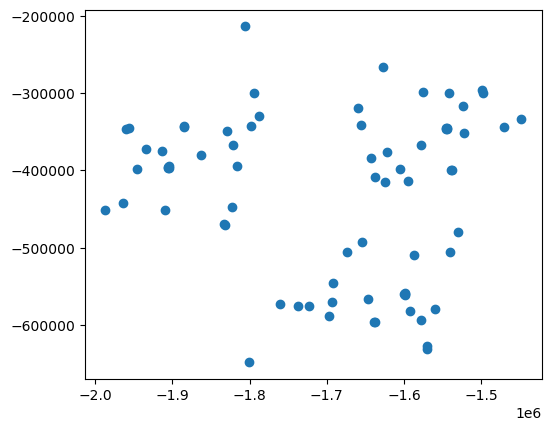

In [10]:
nodal_subset.plot()

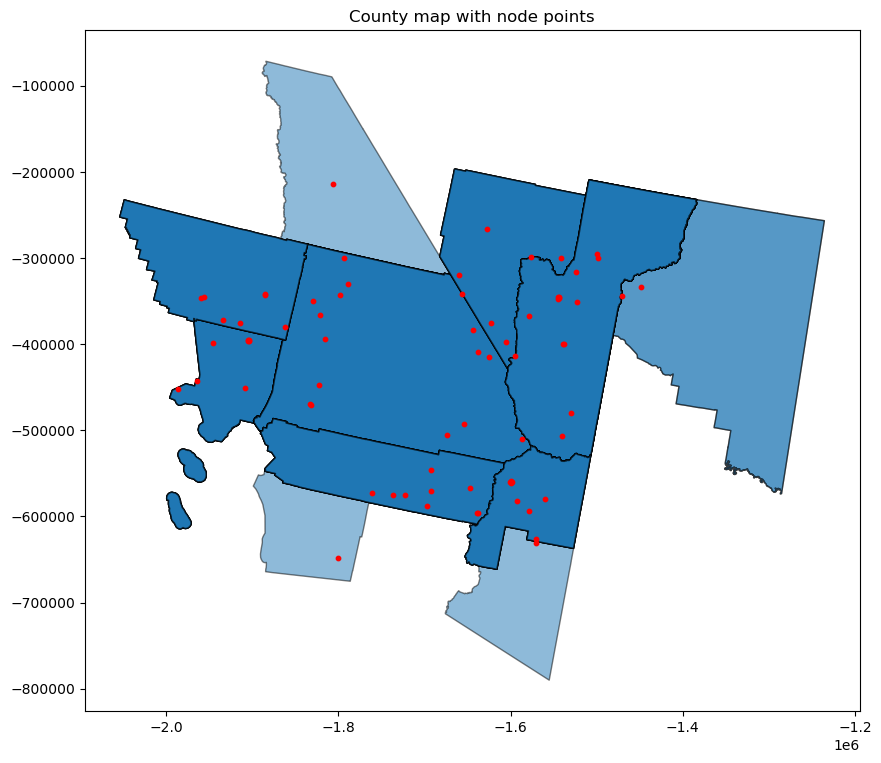

In [19]:
import matplotlib.pyplot as plt
base_county_map = county_subset.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
nodal_subset.plot(ax=base_county_map, color='red', markersize=10)

plt.title('County map with node points')
plt.show()

In [20]:
gdf_ba = gpd.read_file('D:\\akash\\reeds\\ReEDS-2.0\\inputs\\shapefiles\\US_PCA')
gdf_ba


,OBJECTID_1,rb,st,rto,interconne,country,custreg,geometry
0,3,p1,wa,rto1,wscc,usa,Pacific,"MULTIPOLYGON (((-1901196.579 1116132.171, -189..."
1,4,p10,ca,rto4,wscc,usa,Pacific,"MULTIPOLYGON (((-1980688.958 -606870.652, -198..."
2,5,p100,va,rto7,eastern,usa,Southeast,"POLYGON ((1471183.089 39964.475, 1469986.148 3..."
3,6,p101,fl,rto16,eastern,usa,Southeast,"MULTIPOLYGON (((1417327.527 -1679954.745, 1415..."
4,7,p102,fl,rto16,eastern,usa,Southeast,"MULTIPOLYGON (((1539937.191 -1515459.801, 1542..."
...,...,...,...,...,...,...,...,...
129,150,p95,sc,rto15,eastern,usa,Southeast,"POLYGON ((1214677.766 -475459.599, 1217616.425..."
130,151,p96,sc,rto15,eastern,usa,Southeast,"POLYGON ((1389523.232 -779344.091, 1387040.905..."
131,152,p97,nc,rto15,eastern,usa,Southeast,"POLYGON ((1372129.852 -288815.698, 1375944.162..."
132,153,p98,nc,rto15,eastern,usa,Southeast,"MULTIPOLYGON (((1577075.929 -566265.889, 15769..."


In [21]:
gdf_nodes_ba = gdf_nodes.to_crs(gdf_ba.crs)
gdf_nodes_ba

,Bus_ID,Bus_Name,BaseKV,Bus_Type,MW_Load,MVAR_Load,V_Mag,V_Angle,MW_Shunt_G,MVAR_Shunt_B,...,Sub_Area,Zone,lat,lng,county_name,st,nodal,county,ba,geometry
0,101,Abel,138.0,PV,108.0,22.0,1.04777,-7.74152,0.0,0.0,...,11.0,11.0,33.396103,-113.835642,la paz,AZ,b101,p04012,p28,POINT (-1570107.419 -626752.667)
1,104,Agricola,138.0,PQ,74.0,15.0,1.01765,-10.56614,0.0,0.0,...,11.0,11.0,33.812304,-113.825419,la paz,AZ,b104,p04012,p28,POINT (-1560147.874 -579254.675)
2,105,Aiken,138.0,PQ,71.0,14.0,1.03568,-10.70887,0.0,0.0,...,11.0,11.0,33.659560,-113.999023,la paz,AZ,b105,p04012,p28,POINT (-1578522.122 -593877.253)
3,106,Alber,138.0,PQ,136.0,28.0,1.03242,-13.27944,0.0,-100.0,...,11.0,12.0,33.738036,-114.181924,la paz,AZ,b106,p04012,p28,POINT (-1592622.019 -581832.857)
4,109,Ali,138.0,PQ,175.0,36.0,1.02610,-8.81524,0.0,0.0,...,11.0,13.0,33.920436,-114.308281,la paz,AZ,b109,p04012,p28,POINT (-1599468.904 -558821.231)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,310,Caruso,138.0,PQ,195.0,40.0,1.05000,-12.30117,0.0,0.0,...,31.0,33.0,34.729316,-118.104525,los angeles,CA,b310,p06037,p10,POINT (-1903788.251 -396316.175)
69,311,Cary,230.0,PQ,0.0,0.0,1.02830,-5.74069,0.0,0.0,...,31.0,33.0,34.742094,-118.111933,los angeles,CA,b311,p06037,p10,POINT (-1904069.417 -394714.010)
70,312,Caxton,230.0,PQ,0.0,0.0,1.01900,-4.14604,0.0,0.0,...,31.0,33.0,34.722963,-118.119887,los angeles,CA,b312,p06037,p10,POINT (-1905259.010 -396730.090)
71,313,Cecil,230.0,PV,265.0,54.0,1.03802,-2.41513,0.0,0.0,...,32.0,34.0,34.265268,-118.018855,los angeles,CA,b313,p06037,p10,POINT (-1909023.837 -450796.829)


In [24]:
nodal_ba_subset = gpd.sjoin(gdf_nodes_ba, gdf_ba, how='inner', predicate='intersects')
nodal_ba_subset.drop(['Bus_ID','BaseKV','Bus_Type', 'MW_Load', 'county_name', 'MVAR_Load','V_Mag', 'V_Angle', 'MW_Shunt_G', 'MVAR_Shunt_B'], axis=1, inplace=True)
nodal_ba_subset

,Bus_Name,Area,Sub_Area,Zone,lat,lng,st_left,nodal,county,ba,geometry,index_right,OBJECTID_1,rb,st_right,rto,interconne,country,custreg
0,Abel,1,11.0,11.0,33.396103,-113.835642,AZ,b101,p04012,p28,POINT (-1570107.419 -626752.667),55,76,p28,az,rto3,wscc,usa,Southwest
1,Agricola,1,11.0,11.0,33.812304,-113.825419,AZ,b104,p04012,p28,POINT (-1560147.874 -579254.675),55,76,p28,az,rto3,wscc,usa,Southwest
2,Aiken,1,11.0,11.0,33.659560,-113.999023,AZ,b105,p04012,p28,POINT (-1578522.122 -593877.253),55,76,p28,az,rto3,wscc,usa,Southwest
3,Alber,1,11.0,12.0,33.738036,-114.181924,AZ,b106,p04012,p28,POINT (-1592622.019 -581832.857),55,76,p28,az,rto3,wscc,usa,Southwest
4,Ali,1,11.0,13.0,33.920436,-114.308281,AZ,b109,p04012,p28,POINT (-1599468.904 -558821.231),55,76,p28,az,rto3,wscc,usa,Southwest
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50,Barton,2,22.0,26.0,35.148591,-114.575774,NV,b215,p32003,p13,POINT (-1594599.399 -413512.893),34,37,p13,nv,rto3,wscc,usa,Southwest
51,Basov,2,22.0,26.0,35.261490,-114.730763,NV,b216,p32003,p13,POINT (-1605137.572 -397939.715),34,37,p13,nv,rto3,wscc,usa,Southwest
52,Bede,2,22.0,25.0,35.419217,-114.979182,NV,b219,p32003,p13,POINT (-1622470.630 -375610.504),34,37,p13,nv,rto3,wscc,usa,Southwest
53,Bell,2,22.0,27.0,36.330981,-115.290210,NV,b222,p32003,p13,POINT (-1627100.681 -265593.838),34,37,p13,nv,rto3,wscc,usa,Southwest


In [25]:
ba_subset = gpd.sjoin(gdf_ba, gdf_nodes_ba, how='inner', predicate='intersects')
ba_subset.drop(['Bus_ID','BaseKV','Bus_Type', 'MW_Load', 'county_name', 'MVAR_Load','V_Mag', 'V_Angle', 'MW_Shunt_G', 'MVAR_Shunt_B'], axis=1, inplace=True)
ba_subset

,OBJECTID_1,rb,st_left,rto,interconne,country,custreg,geometry,index_right,Bus_Name,Area,Sub_Area,Zone,lat,lng,st_right,nodal,county,ba
1,4,p10,ca,rto4,wscc,usa,Pacific,"MULTIPOLYGON (((-1980688.958 -606870.652, -198...",72,Cole,3,32.0,37.0,36.438958,-117.485272,CA,b322,p06027,p10
1,4,p10,ca,rto4,wscc,usa,Pacific,"MULTIPOLYGON (((-1980688.958 -606870.652, -198...",9,Adler,1,11.0,11.0,33.536833,-114.670399,CA,b103,p06065,p10
1,4,p10,ca,rto4,wscc,usa,Pacific,"MULTIPOLYGON (((-1980688.958 -606870.652, -198...",17,Avery,1,12.0,16.0,33.542965,-114.656488,CA,b124,p06065,p10
1,4,p10,ca,rto4,wscc,usa,Pacific,"MULTIPOLYGON (((-1980688.958 -606870.652, -198...",11,Arthur,1,12.0,16.0,33.506184,-115.329508,CA,b115,p06065,p10
1,4,p10,ca,rto4,wscc,usa,Pacific,"MULTIPOLYGON (((-1980688.958 -606870.652, -198...",14,Astor,1,12.0,17.0,33.544531,-115.799956,CA,b118,p06065,p10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,76,p28,az,rto3,wscc,usa,Southwest,"POLYGON ((-1174160.004 -266445.475, -1196335.1...",5,Allen,1,11.0,13.0,33.912793,-114.292965,AZ,b110,p04012,p28
55,76,p28,az,rto3,wscc,usa,Southwest,"POLYGON ((-1174160.004 -266445.475, -1196335.1...",7,Archer,1,11.0,13.0,33.910866,-114.313402,AZ,b112,p04012,p28
55,76,p28,az,rto3,wscc,usa,Southwest,"POLYGON ((-1174160.004 -266445.475, -1196335.1...",4,Ali,1,11.0,13.0,33.920436,-114.308281,AZ,b109,p04012,p28
55,76,p28,az,rto3,wscc,usa,Southwest,"POLYGON ((-1174160.004 -266445.475, -1196335.1...",56,Balch,2,21.0,22.0,35.933814,-113.317701,AZ,b208,p04005,p28


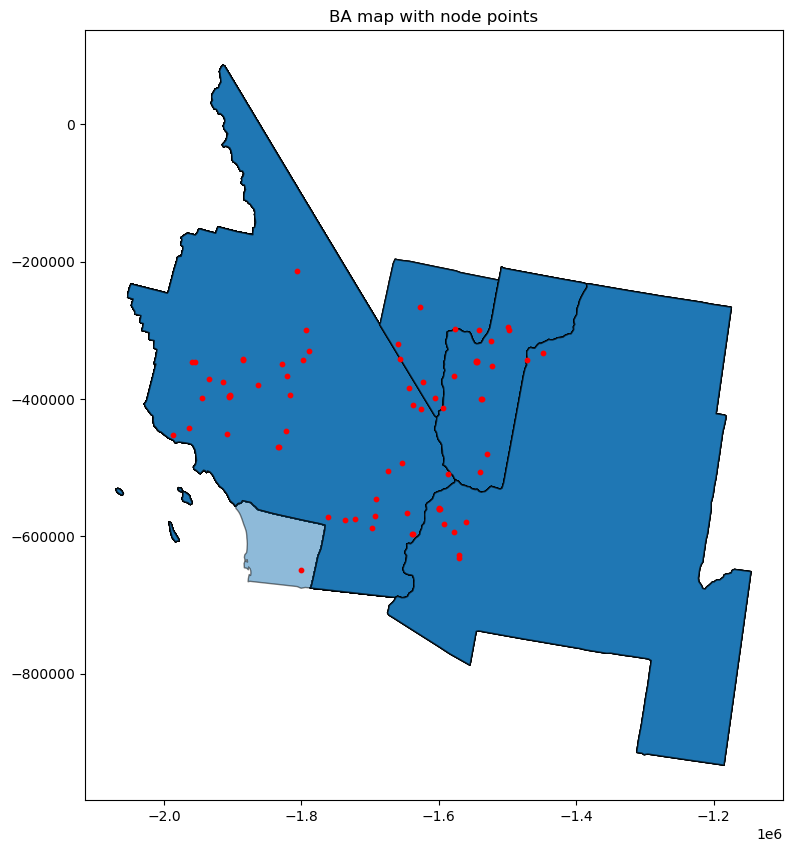

In [26]:
base_ba_map = ba_subset.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
nodal_ba_subset.plot(ax=base_ba_map, color='red', markersize=10)

plt.title('BA map with node points')
plt.show()